## 1.Introduce Dataset


The MC_Maze dataset includes data from recording sessions of a macaque performing delayed center-out reaches, with neural activity recorded from the primary motor and dorsal premotor cortices. This data was provided by Krishna Shenoy, Mark Churchland, and Matt Kaufman from Stanford University

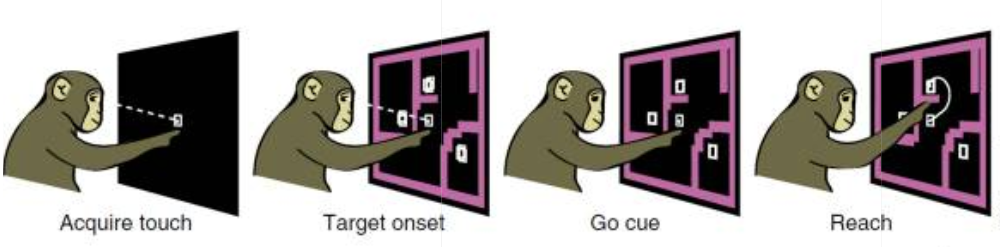

In [45]:
from IPython.display import display, Image
display(Image(filename="/home/liruixin/workspace/bcinterface/code/common_dataset/img/maze.png", embed=True))

## 2.Import Dataset

In [46]:
from nlb_tools.nwb_interface import NWBDataset

In [47]:
dataset = NWBDataset("/home/liruixin/workspace/bcinterface/000128/sub-Jenkins", "*train", split_heldout=False)


The trial info dataframe has a number of fields containing information about each trial:
* `trial_id` - a number assigned to each trial during loading
* `start_time` - time when the trial begins
* `end_time` - time when the trial ends
* `trial_type` - the maze configuration that was used for the trial
* `trial_version` - a number 0-2 indicating which variant of the maze is presented. 0 is 1-target no-barrier, 1 is 1-target with barriers, 2 is 3-target with barriers
* `maze_id` - a unique identifier for the maze configuration used. Different maze sets were used for each session, so `trial_type` is not unique across dataset files
* `success` - whether the trial was successful. In provided training data, unsuccessful trials have already been removed
* `target_on_time` - time of target presentation
* `go_cue_time` - time of go cue
* `move_onset_time` - time of movement onset, calculated offline with robust algorithm
* `rt` - reaction time in ms
* `delay` - time between target presentation and go cue in ms
* `num_targets` - number of targets displayed in the maze
* `target_pos` - x and y position of the target(s)
* `num_barriers` - number of barriers in the maze
* `barrier_pos` - position of the barrier(s). First two values are the x and y positions of the center of the barrier, last two values are the half-width and half-height of the barrier
* `active_target` - which target is reachable and was hit by the monkey. Its value corresponds to the index of the target in `target_pos`

In [48]:
dataset.trial_info

,trial_id,start_time,end_time,trial_type,trial_version,maze_id,success,target_on_time,go_cue_time,move_onset_time,rt,delay,num_targets,target_pos,num_barriers,barrier_pos,active_target,split
0,0,0 days 00:00:00,0 days 00:00:03.321000,25,2,84,True,0 days 00:00:00.880000,0 days 00:00:01.478000,0 days 00:00:01.905000,427,598,3,"[[-111, -82], [-108, 81], [118, 72]]",8,"[[69, 31, 14, 99], [69, 54, 5, 101], [-62, -48...",2,val
1,1,0 days 00:00:03.400000,0 days 00:00:06.521000,3,1,3,True,0 days 00:00:04.291000,0 days 00:00:04.739000,0 days 00:00:05.280000,541,448,1,"[[-116, -5]]",6,"[[-69, -16, 13, 69], [-120, -62, 83, 15], [95,...",0,val
2,2,0 days 00:00:06.600000,0 days 00:00:09.856000,22,1,66,True,0 days 00:00:07.471000,0 days 00:00:07.969000,0 days 00:00:08.346000,377,498,1,"[[-82, -86]]",9,"[[34, -41, 86, 8], [9, -42, 33, 19], [7, -41, ...",0,train
3,3,0 days 00:00:09.900000,0 days 00:00:12.946000,29,2,100,True,0 days 00:00:10.853000,0 days 00:00:11.335000,0 days 00:00:11.752000,417,482,3,"[[-109, 2], [2, 82], [132, -65]]",9,"[[-9, 52, 43, 8], [-50, 91, 14, 64], [-133, -5...",1,train
4,4,0 days 00:00:13,0 days 00:00:15.481000,21,0,65,True,0 days 00:00:13.687000,0 days 00:00:14.235000,0 days 00:00:14.507000,272,548,1,"[[27, 82]]",0,[],0,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,2290,0 days 01:55:36.600000,0 days 01:55:39.796000,34,1,91,True,0 days 01:55:37.362000,0 days 01:55:38.277000,0 days 01:55:38.585000,308,915,1,"[[116, -77]]",7,"[[66, -43, 30, 9], [-66, 1, 11, 70], [-35, 50,...",0,train
2291,2291,0 days 01:55:39.900000,0 days 01:55:42.736000,15,1,75,True,0 days 01:55:40.717000,0 days 01:55:41.265000,0 days 01:55:41.641000,376,548,1,"[[133, -81]]",9,"[[-33, 47, 37, 6], [-77, 48, 61, 11], [-64, -2...",0,train
2292,2292,0 days 01:55:42.800000,0 days 01:55:45.766000,23,0,67,True,0 days 01:55:43.465000,0 days 01:55:44.396000,0 days 01:55:44.714000,318,931,1,"[[94, -86]]",0,[],0,train
2293,2293,0 days 01:55:45.800000,0 days 01:55:49.201000,25,2,84,True,0 days 01:55:46.631000,0 days 01:55:46.663000,0 days 01:55:47.616000,953,32,3,"[[-111, -82], [-108, 81], [118, 72]]",8,"[[69, 31, 14, 99], [69, 54, 5, 101], [-62, -48...",2,val


In [49]:
dataset.data

signal_type             cursor_pos            eye_pos           hand_pos  \
channel                          x          y       x      y           x   
clock_time                                                                 
0 days 00:00:00          -0.900000  -5.700000     7.2    2.0   -0.714908   
0 days 00:00:00.001000   -0.907457  -5.687027     7.2    2.1   -0.717532   
0 days 00:00:00.002000   -0.912768  -5.672115     7.6    1.2   -0.720323   
0 days 00:00:00.003000   -0.914050  -5.653433     7.4    1.4   -0.723278   
0 days 00:00:00.004000   -0.909980  -5.629617     7.4    3.6   -0.726362   
...                            ...        ...     ...    ...         ...   
0 days 01:55:52.296000 -114.378901 -79.712313   -95.0 -117.5 -114.334012   
0 days 01:55:52.297000 -114.366164 -79.728485   -94.9 -117.4 -114.333252   
0 days 01:55:52.298000 -114.365911 -79.749577   -94.6 -117.7 -114.332816   
0 days 01:55:52.299000 -114.378419 -79.774473   -94.8 -117.7 -114.332814   
0 days 01:55:52.300000 -114.400000 -79.800000   -97.8 -118.2 -114.333242   

signal_type                         hand_vel            spikes       ...       \
channel                          y         x          y   1011 1021  ... 2861   
clock_time                                                           ...        
0 days 00:00:00         -40.526123 -2.624567  29.977111    0.0  0.0  ...  0.0   
0 days 00:00:00.001000  -40.496146 -2.707321  30.577662    0.0  0.0  ...  0.0   
0 days 00:00:00.002000  -40.464968 -2.872729  31.744164    0.0  0.0  ...  0.0   
0 days 00:00:00.003000  -40.432658 -3.019660  32.847931    0.0  0.0  ...  0.0   
0 days 00:00:00.004000  -40.399272 -3.059403  33.895227    0.0  0.0  ...  0.0   
...                            ...       ...        ...    ...  ...  ...  ...   
0 days 01:55:52.296000 -114.809976  0.905895  -0.883716    0.0  0.0  ...  0.0   
0 days 01:55:52.297000 -114.810622  0.598148  -0.420075    0.0  0.0  ...  0.0   
0 days 01:55:52.298000 -114.810816  0.218816   0.012961    0.0  0.0  ...  0.0   
0 days 01:55:52.299000 -114.810596 -0.212940   0.393580    0.0  0.0  ...  0.0   
0 days 01:55:52.300000 -114.810029 -0.427820   0.566803    0.0  0.0  ...  0.0   

signal_type                                                          
channel                2862 2871 2881 2882 2911 2931 2941 2951 2961  
clock_time                                                           
0 days 00:00:00         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.001000  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
0 days 00:00:00.002000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.003000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.004000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...                     ...  ...  ...  ...  ...  ...  ...  ...  ...  
0 days 01:55:52.296000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 01:55:52.297000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 01:55:52.298000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 01:55:52.299000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 01:55:52.300000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[6952301 rows x 190 columns]

## 3. Display Data

In [50]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

/tmp/ipykernel_403899/874903525.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


display some tracks of sample

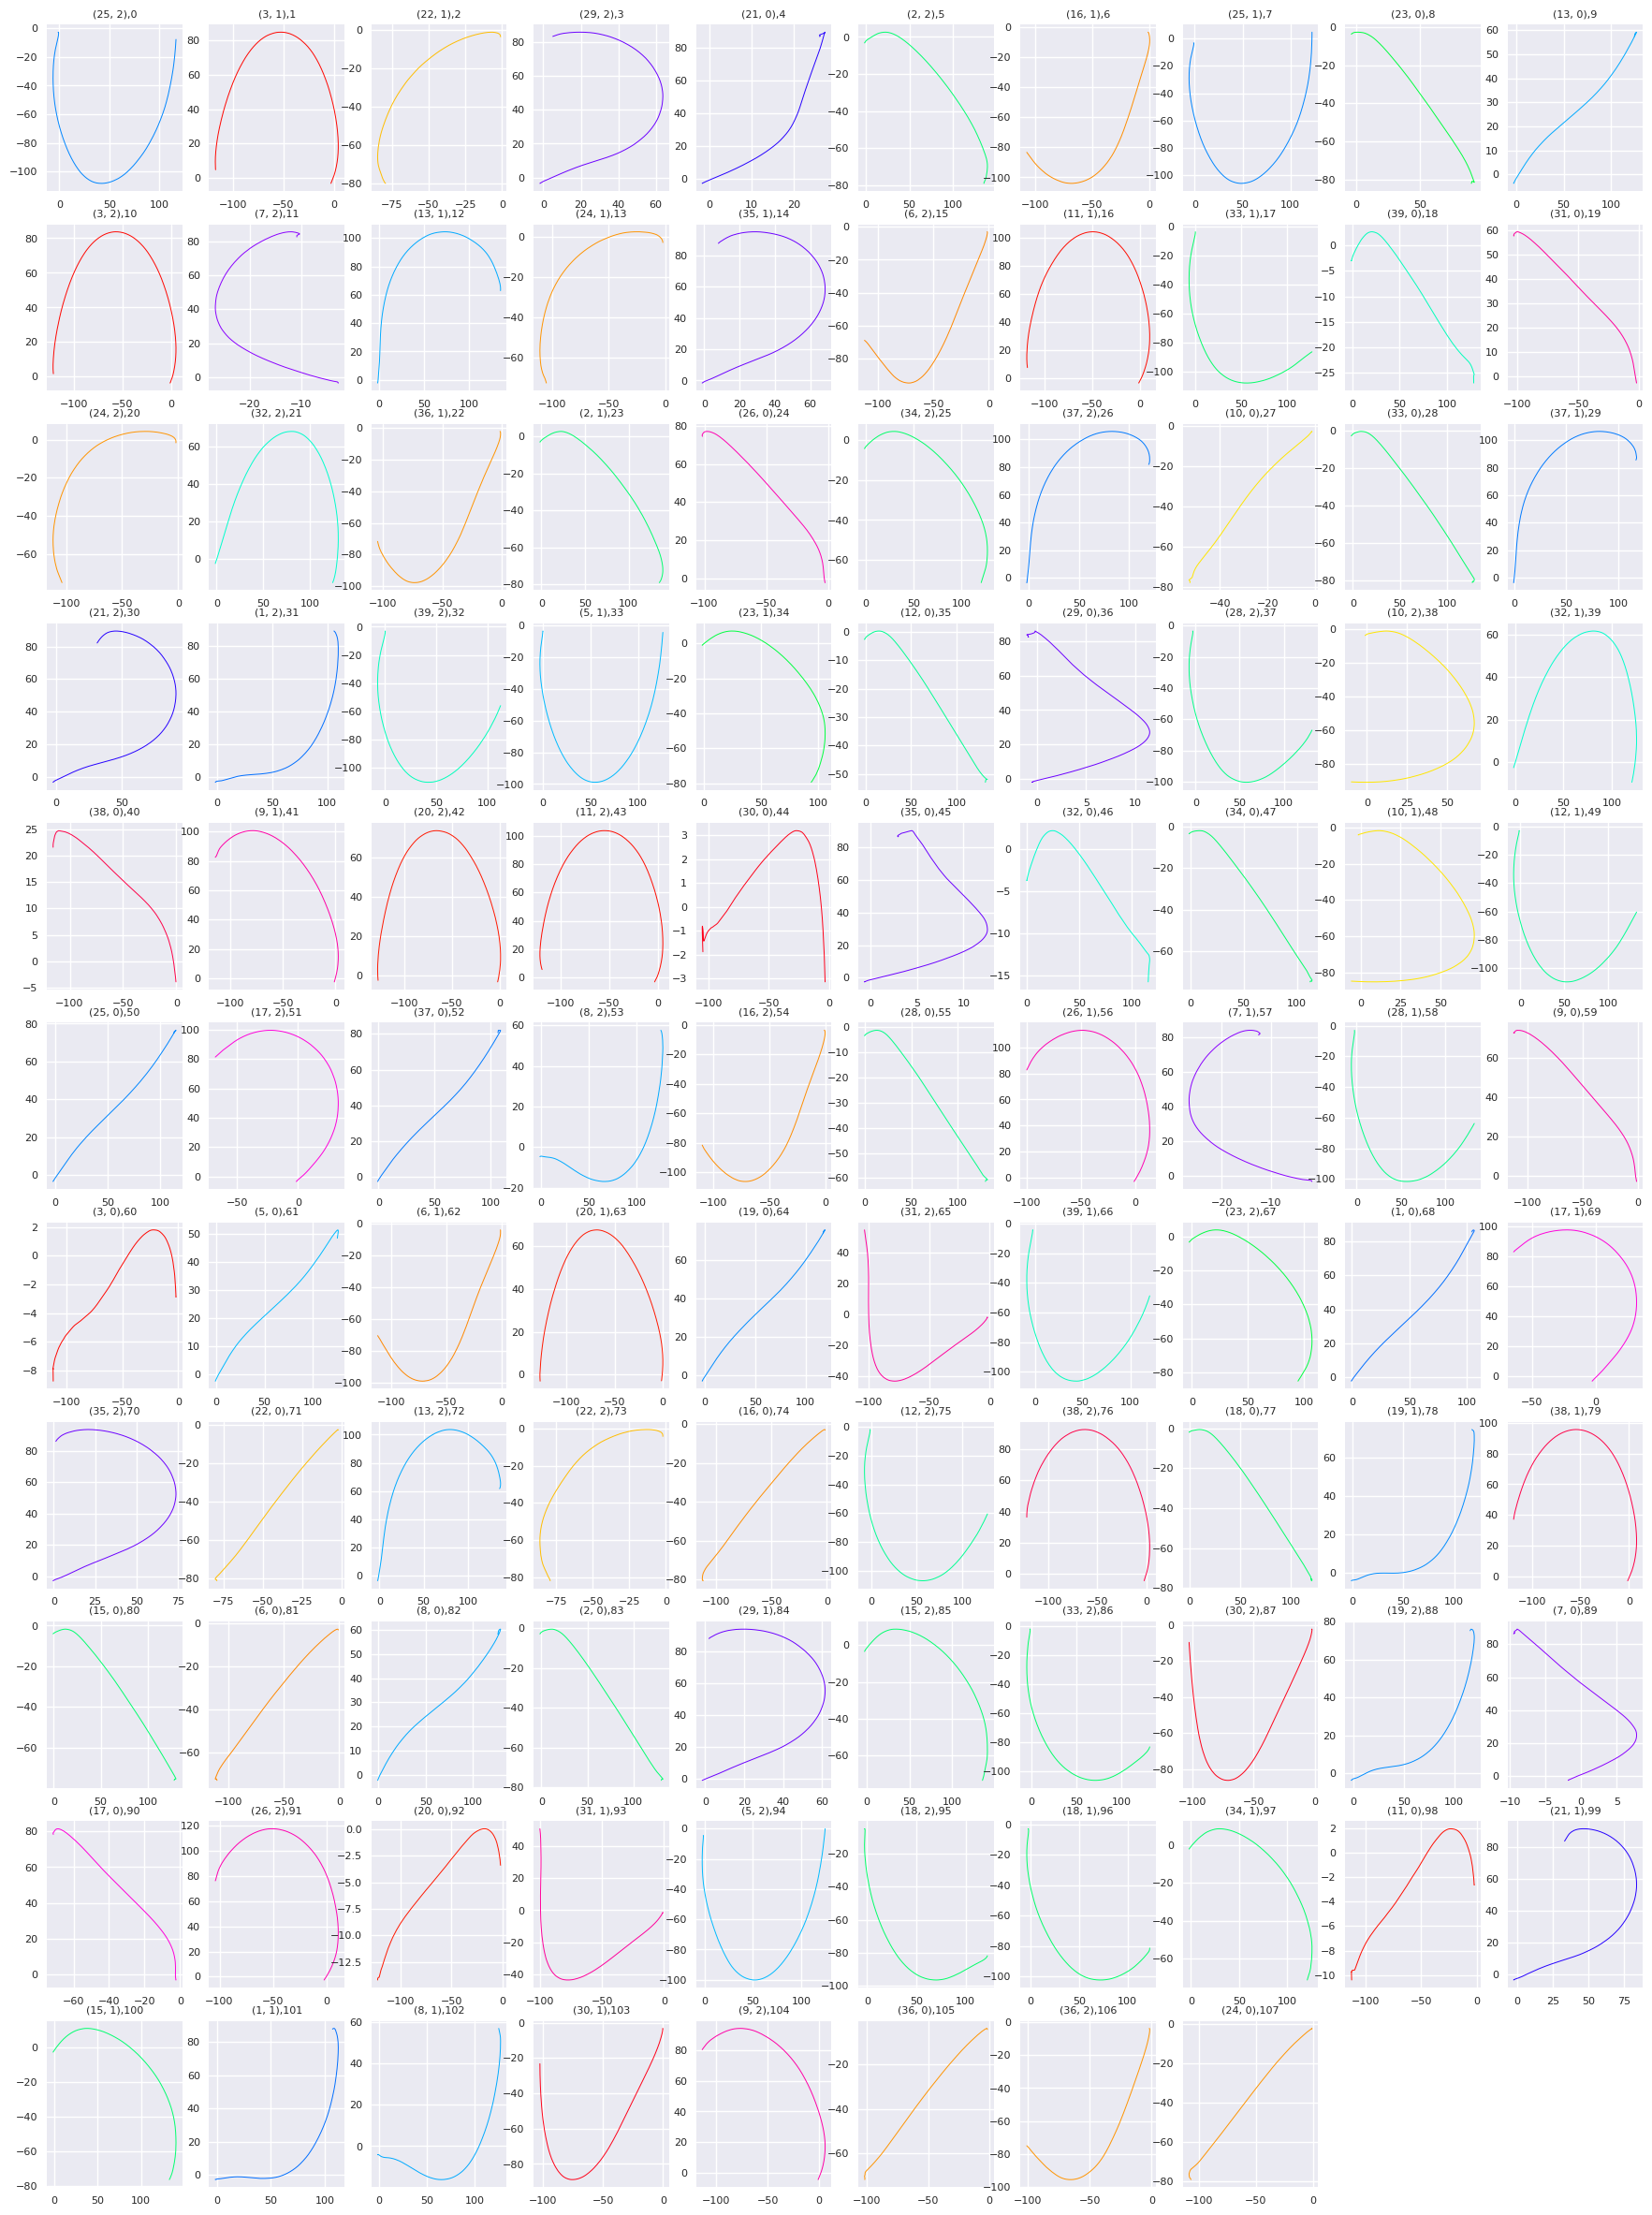

In [51]:
conds = dataset.trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist()
fig, ax = plt.subplots(11,10,figsize=(22,30))
for i in range(11):
    for j in range(10):
        try:
            cond = conds[i*10+j]
        except:
            ax[i, j].axis('off')
            continue
        mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
        # Extract trial data
        trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-50, 450), ignored_trials=(~mask))
        # Average hand position across trials
        traj = trial_data.groupby('align_time')[[('cursor_pos', 'x'), ('cursor_pos', 'y')]].mean().to_numpy()
        # Determine reach angle for color
        active_target = dataset.trial_info[mask].target_pos.iloc[0][dataset.trial_info[mask].active_target.iloc[0]]
        reach_angle = np.arctan2(*active_target[::-1])
        # Plot reach
        color = reach_angle / (2*np.pi) + 0.5
        ax[i, j].plot(traj[:, 0], traj[:, 1], linewidth=0.7, color=plt.cm.hsv(reach_angle / (2*np.pi) + 0.5))
        ax[i, j].set_title(f'{cond},{i*10+j}', fontsize=8)
        # ax[i, j].axis('off')
        ax[i, j].tick_params(axis='both', which='major', labelsize=8) 

cluster

108


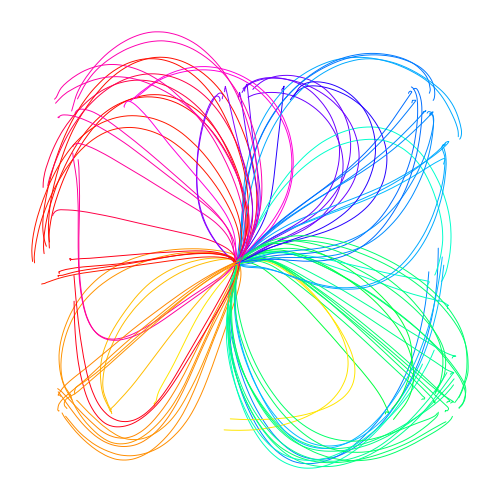

In [52]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
n = 0
for cond in conds:
    mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-50, 450), ignored_trials=(~mask))
    traj = trial_data.groupby('align_time')[[('cursor_pos', 'x'), ('cursor_pos', 'y')]].mean().to_numpy()
    active_target = dataset.trial_info[mask].target_pos.iloc[0][dataset.trial_info[mask].active_target.iloc[0]]
    reach_angle = np.arctan2(*active_target[::-1])
    n = n+1
    ax.plot(traj[:, 0], traj[:, 1], linewidth=0.7, color=plt.cm.hsv(reach_angle / (2*np.pi) + 0.5))
print(n)
plt.axis('off')
plt.show()

## 4. Training 

#### 4.1 Parameters

In [53]:
import torch
num_class = 8
time_step = 500
num_epochs = 2000
num_channel = 182
batch_size = 32
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#### 4.2 Generate dataloader

In [54]:
import random
from tqdm.auto import tqdm
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split



class Mydataset(Dataset):
    def __init__(self,data_list,label_list):
        self.data_list = data_list
        self.label_list = label_list
    def __getitem__(self,index):
        return self.data_list[index],self.label_list[index]
    def __len__(self):
        return len(self.data_list)
    
label = {
        'class0': [0, 7, 33, 94],
        'class1': [1, 10, 43],
        'class2': [3, 14, 70, 84],
        'class3': [5, 23, 55, 80, 83],
        'class4': [6, 22, 54, 106],
        'class5': [12, 26,29, 72],
        'class6': [9, 61, 82],
        'class7': [17, 75, 86],
        }

conds = dataset.trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist()
data_list = []
label_list = []
for index in tqdm(range(len(conds))):
    cond = conds[index]
    mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    # Extract trial data
    trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-50, 450), ignored_trials=(~mask))
    begin = 0
    end = begin + 500
    for key, values_list in label.items():
        for trial in (range(trial_data.shape[0]//500)):
            if index in values_list:
                sample = trial_data['spikes'][begin:end].to_numpy()
                data_list.append(sample)
                label_list.append(int(key[-1]))
                begin += 500
                end += 500


random.seed(42)  
combined = list(zip(data_list, label_list))
random.shuffle(combined)
data_list, label_list = zip(*combined)
data_list = list(data_list)
label_list = list(label_list)


train_data, test_data, train_labels, test_labels = train_test_split(
                                                    data_list, 
                                                    label_list, 
                                                    test_size=0.3, 
                                                    random_state=43)

train_dataset = Mydataset(train_data,train_labels)
test_dataset = Mydataset(test_data,test_labels)

train_dataloader  = DataLoader(train_dataset,batch_size=batch_size,drop_last=True)
test_dataloader = DataLoader(test_dataset,batch_size=len(test_dataset))


100%|██████████| 108/108 [02:56<00:00,  1.63s/it]


#### 4.3 Define Network

In [55]:
from rockpool.nn.modules import LIFExodus, LIFTorch
from rockpool.nn.networks import SynNet

if str(device) == 'cpu':
    neuron_model = LIFTorch
else:
    neuron_model = LIFExodus
    
synnet = SynNet(
    n_channels=num_channel,
    n_classes=num_class,
    size_hidden_layers = [60],
    output='spikes',
    neuron_model=neuron_model,
    threshold = 0.1,
    dt = 0.001
)

In [56]:
synnet.load('/home/liruixin/workspace/bcinterface/models/model_first_spike_62_0.954.json')

#### 4.4 Training

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support, confusion_matrix
import torch.optim as optim
import torch.nn as nn


def snn_train_spike(device, train_dataloader, test_dataloader, model):
    criterion = nn.CrossEntropyLoss()
    criterion.to(device)
    model.to(device)
    print('device:',device)
    opt = optim.Adam(model.parameters().astorch(), lr=0.0001)
    for epoch in tqdm(range(2000)):
        # scheduler.step()
        train_preds = []
        train_targets = []
        sum_loss = 0.0
        for batch, target in (train_dataloader):
            batch = batch.to(torch.float32).to(device)
            target_loss = target.to(device)
            model.reset_state()
            opt.zero_grad()
            out_model, _, rec = model(batch, record=True)
            out = torch.sum(out_model,dim=1)
            loss = criterion(out, target_loss)
            loss.backward()
            opt.step()

            with torch.no_grad():
                pred = out.argmax(1).detach().to(device)
                train_preds += pred.detach().cpu().numpy().tolist()
                train_targets += target.detach().cpu().numpy().tolist()
                sum_loss += loss.item() / len(train_dataloader)

        test_preds = []
        test_targets = []

        for batch, target in (test_dataloader):
            with torch.no_grad():
                batch = batch.to(torch.float32).to(device)
                model.reset_state()
                out_model, _, rec = model(batch, record=True)
                out = torch.sum(out_model,dim=1)
                pred = out.argmax(1).detach().to(device)
                test_preds += pred.detach().cpu().numpy().tolist()
                test_targets += target.detach().cpu().numpy().tolist()
 
        f1 = f1_score(test_targets, test_preds, average="macro")
        _, test_precision, test_recall, _ = precision_recall_fscore_support(
            test_targets, test_preds, labels=np.arange(8)
        )
        test_accuracy = accuracy_score(test_targets, test_preds)
        cm = confusion_matrix(test_targets, test_preds)
        # losslist.append(test_loss)
        print(f"F1 Score = {f1}")
        print(f"Val Precision = {test_precision}, Recall = {test_recall}")
        print(f"Accuracy:{test_accuracy}")
        # print(cm)
        if np.all(test_accuracy > 0.95):
            print("Confusion Matrix:")
            print(cm)
            print('The training is finished') 
            break

In [58]:
snn_train_spike(device=device,
            train_dataloader=train_dataloader,
            test_dataloader=test_dataloader,
            model=synnet)

device: cuda:0


  0%|          | 1/2000 [00:00<12:14,  2.72it/s]

F1 Score = 0.8723193658586024
Val Precision = [0.96428571 0.95238095 1.         0.89655172 1.         0.85714286
 1.         0.33333333], Recall = [0.81818182 0.97560976 1.         0.94545455 0.96666667 0.92307692
 0.86956522 0.48      ]
Accuracy:0.8969072164948454


  0%|          | 1/2000 [00:00<23:15,  1.43it/s]

F1 Score = 0.9521502235318025
Val Precision = [0.85714286 1.         1.         1.         0.93103448 1.
 1.         0.83333333], Recall = [0.84210526 1.         1.         1.         0.96428571 1.
 1.         0.81081081]
Accuracy:0.9536082474226805
Confusion Matrix:
[[24  0  0  0  0  0  0  4]
 [ 0 21  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0]
 [ 2  0  0  0 27  0  0  0]
 [ 0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  0 20  0]
 [ 3  0  0  0  0  0  0 15]]
The training is finished
